# `QSDsan Workshop ` <a class="anchor" id="top"></a>

- **Prepared by:**
    
    - [Yalin Li](https://qsdsan.readthedocs.io/en/latest/authors/Yalin_Li.html)

- **Covered topics:**

    - [0. Binder Overview](#s0)
    - [1. Systems](#s1)
    - [2. Uncertainty and Sensitivity Analyses](#s2)
    - [3. Country-Specific Analysis](#s3)

#!!! Link needs to bo updated
To run tutorials in your browser, go to this [Binder page](https://mybinder.org/v2/gh/QSD-Group/QSDsan/main?filepath=%2Fdocs%2Fsource%2Ftutorials).

In [1]:
#!!! Delete when testing with the released `qsdsan`
import os, sys
pwd = sys.path[0]
for abbr in ('tmo', 'bst', 'qs'):
    sys.path.append(os.path.abspath(os.path.join(pwd, f'../{abbr}')))

## 0. Binder Overview
A reminder to briefly go over how to use binder to run Jupyter Notebook.

[Back to top](#top)

## 1. Systems <a class="anchor" id="s1"></a>

As we introduced earlier in this workshop, in this example we are from a community deciding which kind of toilets we would like to install.

We have two options: pit latrine or urine-diverting dry toilet (UDDT). The pit latrine is cheaper, but the excreta may leach into the environment, and the low emptying frequency of it leads to more organic degradation that releases CH4 and N2O. UDDT, on the other hand, has higher capital and operating costs, but it separates urine from the solid wastes, thus can recovery more nutrients (N, P, and K). It is also cleaned at a more higher frequency than the pit latrine, therefore releases much less greenhouse gases (GHGs).

For the sake of time, we have pre-constructed those examples, but you can find all the codes for this [workshop](https://github.com/QSD-Group/QSDsan-workshop) (and those for [QSDsan](https://github.com/QSD-Group/QSDsan)) on GitHub.

### 1.1. System setup

In [2]:
# Let's have a look at the system
# `sysA` is the system for pit latrine and `sysB` for UDDT
from systems import sysA, sysB

As we can see, for both systems we include the human excreta input units (`A1`, `B1`), the toilets (`A2`, `B2`), the transportation units (`A3`, `B3`&`B4`).

Additionally, the the crop application units (`A4`, `B5`&`B6`) are used to account for the handling loss of the nutrients in the excreta, fugitative mixers (`A5`&`A6`, `B7`&`B8`) are used to record how the fugitative CH4 and N2O, and the splitters (`A7`, `B9`&`B10`) are used for easy calculation of the nutrient recoveries.

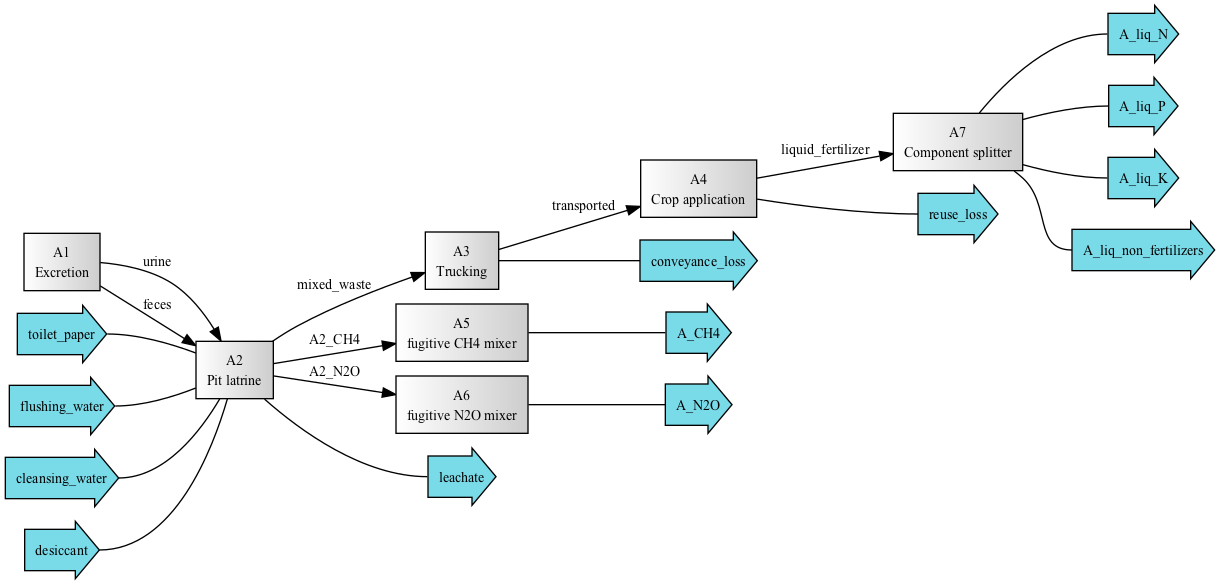

In [3]:
sysA.diagram()

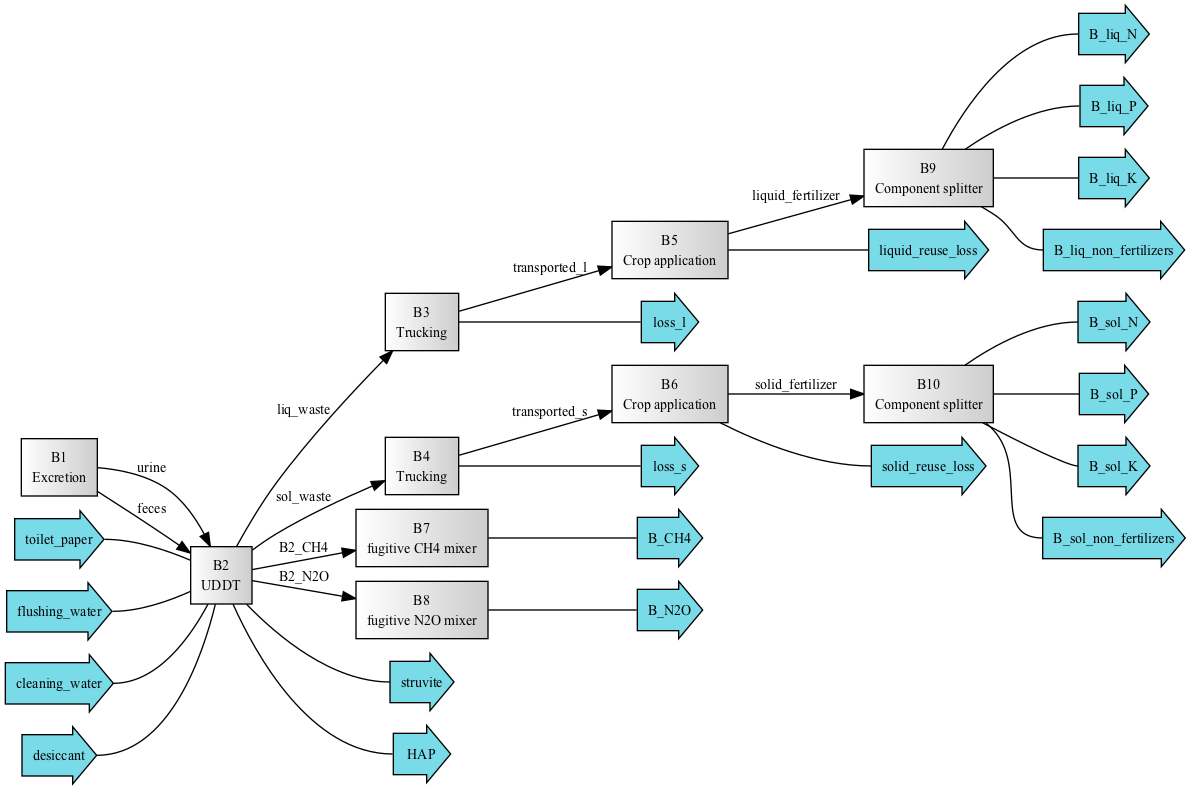

In [4]:
sysB.diagram()

### 1.2. TEA and LCA

In [5]:
# To get a quick peek of the results,
# the functions were premade for convenience
from systems import get_daily_cap_cost, get_daily_cap_ghg

In [6]:
# To look at cost of different categories
get_daily_cap_cost(system=sysA, kind='net', print_msg=True)
get_daily_cap_cost(system=sysA, kind='CAPEX', print_msg=True)
get_daily_cap_cost(system=sysA, kind='OPEX', print_msg=True)
get_daily_cap_cost(system=sysA, kind='sales', print_msg=True)

Daily net cost for sysA is ¢1.74/cap/d.
Daily CAPEX cost for sysA is ¢1.19/cap/d.
Daily OPEX cost for sysA is ¢1.02/cap/d.
Daily sales cost for sysA is ¢0.23/cap/d.


0.2320541335520357

In [7]:
# Same for `sysB`
get_daily_cap_cost(system=sysB, kind='net', print_msg=True)
get_daily_cap_cost(system=sysB, kind='CAPEX', print_msg=True)
get_daily_cap_cost(system=sysB, kind='OPEX', print_msg=True)
get_daily_cap_cost(system=sysB, kind='sales', print_msg=True)

Daily net cost for sysB is ¢3.35/cap/d.
Daily CAPEX cost for sysB is ¢1.47/cap/d.
Daily OPEX cost for sysB is ¢3.08/cap/d.
Daily sales cost for sysB is ¢0.38/cap/d.


0.380349705918588

In [8]:
# And the same goes for LCA results
get_daily_cap_ghg(system=sysA, kind='net', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='capital', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='operating', print_msg=True)
get_daily_cap_ghg(system=sysA, kind='transportation', print_msg=True) # operating = transportation+direct-offset
get_daily_cap_ghg(system=sysA, kind='direct', print_msg=True) # direct emission from CH4 and N2O
get_daily_cap_ghg(system=sysA, kind='offset', print_msg=True) # offset from N, P, and K

Daily net emission for sysA is 62.8 g CO2-e/cap/d.
Daily capital emission for sysA is 21.9 g CO2-e/cap/d.
Daily operating emission for sysA is 40.9 g CO2-e/cap/d.
Daily transportation emission for sysA is 0.7 g CO2-e/cap/d.
Daily direct emission for sysA is 60.6 g CO2-e/cap/d.
Daily offset emission for sysA is 20.4 g CO2-e/cap/d.


20.383607440442166

In [9]:
# `sysB`
get_daily_cap_ghg(system=sysB, kind='net', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='capital', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='operating', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='transportation', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='direct', print_msg=True)
get_daily_cap_ghg(system=sysB, kind='offset', print_msg=True)

Daily net emission for sysB is -5.2 g CO2-e/cap/d.
Daily capital emission for sysB is 32.5 g CO2-e/cap/d.
Daily operating emission for sysB is -37.7 g CO2-e/cap/d.
Daily transportation emission for sysB is 1.7 g CO2-e/cap/d.
Daily direct emission for sysB is 0.2 g CO2-e/cap/d.
Daily offset emission for sysB is 39.7 g CO2-e/cap/d.


39.727222435969

You can know much more about the systems using QSDsan, we cannot show them all here during to time limit, but you are welcome to checkout QSDsan's [documentation](https://qsdsan.readthedocs.io/en/latest/), which includes step-to-step tutorials to help you start from zero (you will find links to the YouTube demo videos in the tutorial).

In [10]:
# For example, you can do the following to know more about a unit
sysA.units

[<Excretion: A1>,
 <PitLatrine: A2>,
 <Trucking: A3>,
 <CropApplication: A4>,
 <Mixer: A5>,
 <Mixer: A6>,
 <ComponentSplitter: A7>]

In [11]:
flowsheetA = sysA.flowsheet
A2 = flowsheetA.unit.A2
A2.results()

Pit latrine                                      Units       A2
Design              Number of users per toilet               16
                    Parallel toilets                   2.85e+04
                    Emptying period                 yr      0.8
                    Single pit volume               m3     3.66
                    Single pit area                 m2      0.8
                    Single pit depth                 m     4.57
                    Cement                          kg    2e+07
                    Sand                            kg 9.05e+07
                    Gravel                          kg 3.65e+07
                    Brick                           kg 6.47e+06
                    Plastic                         kg 2.88e+05
                    Steel                           kg 9.58e+05
                    Wood                            m3 5.42e+03
                    Excavation                      m3 1.04e+05
Purchase cost       Total toilets                  USD 1.28e+07
Total purchase cost                                USD 1.28e+07
Utility cost                                    USD/hr        0
Additional OPEX                                 USD/hr     73.1

In [12]:
# Or a stream
mixed_waste = A2.outs[0]
mixed_waste.show()

WasteStream: mixed_waste from <PitLatrine: A2> to <Trucking: A3>
 phase: 'l', T: 298.15 K, P: 101325 Pa
 flow (g/hr): NH3      2.3e+04
              NonNH3   2.91e+04
              P        1.56e+04
              K        3.31e+04
              Mg       8.56e+03
              Ca       4.15e+04
              H2O      1.28e+07
              OtherSS  9.71e+05
              Tissue   1.29e+05
 WasteStream-specific properties:
  pH         : 7.0
  COD        : 27076.5 mg/L
  TN         : 3685.8 mg/L
  TP         : 1106.3 mg/L
  TK         : 2344.3 mg/L
 Component concentrations (mg/L):
  NH3       1625.8
  NonNH3    2060.0
  P         1106.3
  K         2344.3
  Mg        605.8
  Ca        2934.7
  H2O       907360.5
  OtherSS   68687.2
  Tissue    9097.6


### 1.3. MCDA

In [13]:
# Assume we will make the decision based on TEA/LCA results
from systems import mcda, run_mcda
run_mcda(systems=(sysA, sysB), econ_weight=0.4, print_msg=True) # environmental criterion weight will be 1-0.4=0.6

The score for sysA is 0.208, for sysB is 0.792, sysB is selected.


,Ratio,Description,sysA,sysB
0,1:1,"Econ, Env",0.208,0.792


In [14]:
# To look at the impact of criterion weight
econ_weights = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
scoresA = []
scoresB = []
for weight in econ_weights:
    score_df = run_mcda(systems=(sysA, sysB), econ_weight=weight, print_msg=False)
    scoresA.append(score_df.sysA.item())
    scoresB.append(score_df.sysB.item())

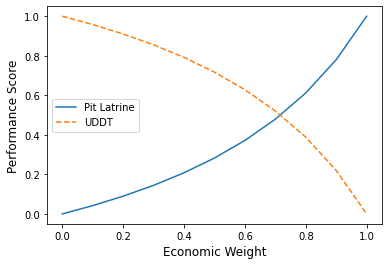

In [15]:
# Quick visualization
from matplotlib import pyplot as plt
plt.plot(econ_weights, scoresA, '-', label='Pit Latrine')
plt.plot(econ_weights, scoresB, '--', label='UDDT')
plt.xlabel('Economic Weight', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)
plt.legend()

[Back to top](#top)

## 2. Uncertainty and Sensitivity Analyses <a class="anchor" id="s2"></a>

In [16]:
# To enable uncertainty and sensitivity analyses, we can use system models
from models import run_uncertainties, get_param_metric
from qsdsan import stats as s

In [17]:
modelA, modelB = run_uncertainties(N=100) # N is the number of samples we want to run

In [18]:
# To look at the uncertain parameters and result metrics included in the model
modelA.parameters

(<Parameter: [Excretion-A1] Excretion e cal (kcal/cap/d)>,
 <Parameter: [Excretion-A1] Excretion p veg (g/cap/d)>,
 <Parameter: [Excretion-A1] Excretion p anim (g/cap/d)>,
 <Parameter: [Excretion-A1] Excretion N prot (fraction)>,
 <Parameter: [Excretion-A1] Excretion P prot v (fraction)>,
 <Parameter: [Excretion-A1] Excretion P prot a (fraction)>,
 <Parameter: [Excretion-A1] Excretion K cal (g K/1000 kcal)>,
 <Parameter: [Excretion-A1] Excretion N exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion P exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion K exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion e exc (fraction of intake)>,
 <Parameter: [Excretion-A1] Excretion N ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion P ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion K ur (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion e fec (fraction of total)>,
 <Parameter: [Excretion-A1] Excretion N ur NH3 (fraction of

In [19]:
modelA.metrics

(<Metric: [recovery] N recovery>,
 <Metric: [recovery] P recovery>,
 <Metric: [recovery] K recovery>,
 <Metric: [TEA] Net cost (¢/cap/yr)>,
 <Metric: [TEA] CAPEX (¢/cap/yr)>,
 <Metric: [TEA] OPEX (¢/cap/yr)>,
 <Metric: [TEA] sales (¢/cap/yr)>,
 <Metric: [LCA] Net emission (g CO2-e/cap/d)>,
 <Metric: [LCA] Construction (g CO2-e/cap/d)>,
 <Metric: [LCA] Transportation (g CO2-e/cap/d)>,
 <Metric: [LCA] Direct (g CO2-e/cap/d)>,
 <Metric: [LCA] Offset (g CO2-e/cap/d)>)

In [20]:
modelA.table # the raw results

Element                  Excretion-A1                            \
Variable Excretion e cal [kcal/cap/d] Excretion p veg [g/cap/d]   
0                            2.14e+03                      40.6   
1                            1.96e+03                      41.8   
2                             2.2e+03                      36.8   
3                            1.94e+03                      42.3   
4                               2e+03                        44   
..                                ...                       ...   
95                           2.14e+03                        38   
96                           2.15e+03                      36.9   
97                           2.01e+03                      40.8   
98                           2.08e+03                      38.2   
99                           2.12e+03                      42.8   

Element                                                          \
Variable Excretion p anim [g/cap/d] Excretion N prot [fraction]   
0                              11.6                       0.161   
1                              11.5                       0.157   
2                              11.7                       0.159   
3                              11.8                       0.175   
4                              13.5                        0.18   
..                              ...                         ...   
95                             12.2                       0.144   
96                             11.6                       0.149   
97                             13.5                       0.147   
98                               13                        0.16   
99                             11.9                        0.17   

Element                                 ...                          LCA  \
Variable Excretion P prot v [fraction]  ... Net emission [g CO2-e/cap/d]   
0                               0.0195  ...                         51.6   
1                               0.0213  ...                           42   
2                               0.0228  ...                         92.2   
3                               0.0231  ...                         81.9   
4                               0.0386  ...                          115   
..                                 ...  ...                          ...   
95                              0.0264  ...                         27.1   
96                             0.00716  ...                          151   
97                              0.0279  ...                         74.7   
98                              0.0272  ...                         38.2   
99                              0.0258  ...                         97.9   

Element                                                               \
Variable Construction [g CO2-e/cap/d] Transportation [g CO2-e/cap/d]   
0                                22.4                           2.03   
1                                17.1                           2.08   
2                                17.7                           3.01   
3                                12.8                           1.66   
4                                36.5                           2.58   
..                                ...                            ...   
95                               19.5                           1.42   
96                               25.7                           1.86   
97                               12.8                           2.04   
98                               20.2                          0.519   
99                               21.4                           1.25   

Element                                                 
Variable Direct [g CO2-e/cap/d] Offset [g CO2-e/cap/d]  
0                          45.4                   18.2  
1                          37.5                   14.6  
2                          85.4                     14  
3                          87.6              

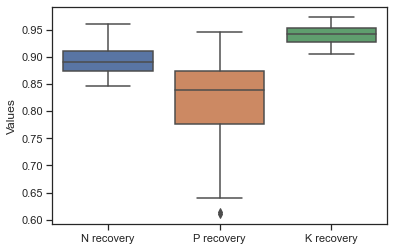

In [21]:
# QSDsan also has handy plotting functions to quickly visualize the results
recoveries = [get_param_metric(name, modelB, 'metric')
              for name in ('N recovery', 'P recovery', 'K recovery')]
fig, ax = s.plot_uncertainties(modelB, x_axis=recoveries)
fig

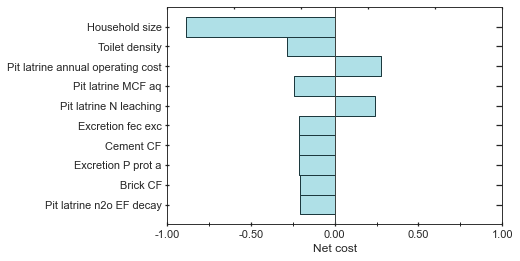

In [22]:
# Get Spearman's rank coefficients to see which parameters are the most important ones for the select metrics
def plot_spearman(model, metric='Net cost', top=None):
    metric = get_param_metric(metric, model, 'metric')
    df = s.get_correlations(modelA, input_y=metric, kind='Spearman')[0]
    fig, ax = s.plot_correlations(df, top=10)
    return fig, ax

fig, ax = plot_spearman(modelA)
fig

[Back to top](#top)

## 3. Country-Specific Analysis <a class="anchor" id="s3"></a>

Finally, what will happen if our community locates in a different place? Then we need to replace contextual parameters (e.g., diet, tax rate) in our analyses to those that are specific for the country of interest.

In [23]:
# For this analysis we considered the following parameters
from country_specific import country_params
# For each line, the key (left text) is the meaning of the parameter,
# the right text is the parameter name remembered by QSDsan
country_params

{'Caloric intake': 'Excretion e cal',
 'Vegetable protein intake': 'Excretion p veg',
 'Animal protein intake': 'Excretion p anim',
 'Food waste ratio': 'Food waste ratio',
 'Price level ratio': 'Price level ratio',
 'N fertilizer price': 'N fertilizer price',
 'P fertilizer price': 'P fertilizer price',
 'K fertilizer price': 'K fertilizer price',
 'Income tax': 'Income tax'}

In [24]:
# You can look up the values for a certain country
from country_specific import get_val_df
get_val_df('US')

,Parameter,Value,Unit
0,Caloric intake,3.78e+03,kcal/cap/d
1,Vegetable protein intake,40.3,g/cap/d
2,Animal protein intake,73.5,g/cap/d
3,N fertilizer price,1.33,USD/kg N
4,P fertilizer price,4,USD/kg P
5,K fertilizer price,1.35,USD/kg K
6,Food waste ratio,0.22,fraction
7,Price level ratio,1,fraction
8,Income tax,0.21,fraction


In [26]:
# And here are the results with those country-specific parameters
from country_specific import get_results
results = get_results('US')
results['sysA']

recovery  N recovery                       0.348
          P recovery                       0.869
          K recovery                       0.648
TEA       Net cost [¢/cap/yr]               1.89
          CAPEX [¢/cap/yr]                  1.14
          OPEX [¢/cap/yr]                    1.2
          sales [¢/cap/yr]                 0.256
LCA       Net emission [g CO2-e/cap/d]      58.8
          Construction [g CO2-e/cap/d]      19.8
          Transportation [g CO2-e/cap/d]    1.24
          Direct [g CO2-e/cap/d]            78.2
          Offset [g CO2-e/cap/d]            40.5
dtype: float64

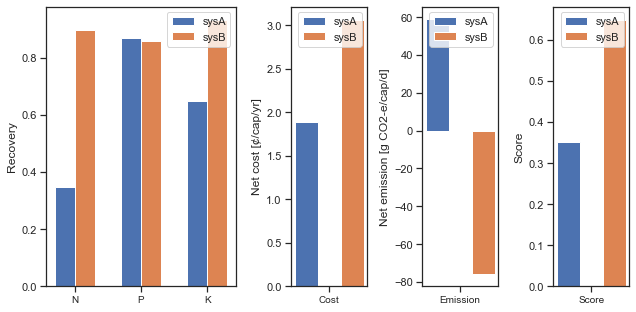

In [29]:
# To do a side-by-side comparison with the Uganda results
# the results might be different from the ones we see above
# as we are using the average data from Uganda
from country_specific import plot
fig = plot(results, econ_weight=0.7)

[Back to top](#top)